# 1. Veri Setinin Hazırlanması

In [1]:
#Kullanacağımız kütüphaneleri yükleyelim.
import pandas as pd
import numpy as np

#görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/international-energy-statistics/all_energy_statistics.csv")
df = df_.copy()
df.head()


,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [3]:
import pandas as pd
import numpy as np
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 55) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

# 2. Veri Setine İlk Bakış

In [4]:
#Veri setinin ilk 3 gözlemini görelim
df.head(n=3)


,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates


In [5]:
df.shape #(satır, sütün)

(1189482, 7)

In [6]:
print(df.columns, '\n')  #veri setinde hangi sütunların olduğunu görürüz.
print(f"Veri setinde toplam{len(df.columns)} sütun vardır.\n")  #Toplam sütun sayısını görürüz.
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n") # veri tipini görürüz.

Index(['country_or_area', 'commodity_transaction', 'year', 'unit', 'quantity',
       'quantity_footnotes', 'category'],
      dtype='object') 

Veri setinde toplam7 sütun vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



In [7]:
df.info() #veri setine ilişkin temel bilgiler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   country_or_area        1189482 non-null  object 
 1   commodity_transaction  1189482 non-null  object 
 2   year                   1189482 non-null  int64  
 3   unit                   1189482 non-null  object 
 4   quantity               1189482 non-null  float64
 5   quantity_footnotes     163946 non-null   float64
 6   category               1189482 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 63.5+ MB


In [8]:
df.dtypes #her sütunun veri tipi

country_or_area           object
commodity_transaction     object
year                       int64
unit                      object
quantity                 float64
quantity_footnotes       float64
category                  object
dtype: object

In [9]:
categorical_features = []
numerical_features = []
for col in df.columns:
    if(df[col].dtype=="object") or (df[col].dtype=="categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)# bir nevi filtreleme yaprak veriyi daha rahat inceledik.


In [10]:
for col in df.columns: #tüm sütunları dolaştık
    if col in categorical_features: #Eğer sütun adı, categorical_features listesinde yer alıyorsa, bu sütunun kategorik bir değişken olduğu varsayılır.
        df[col] = pd.Categorical(df[col]) # bellek kullanımını azaltmak amacıyla verileri kategorik veri türüne dönüştürdük.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   country_or_area        1189482 non-null  category
 1   commodity_transaction  1189482 non-null  category
 2   year                   1189482 non-null  int64   
 3   unit                   1189482 non-null  category
 4   quantity               1189482 non-null  float64 
 5   quantity_footnotes     163946 non-null   float64 
 6   category               1189482 non-null  category
dtypes: category(4), float64(2), int64(1)
memory usage: 34.1 MB


In [12]:
df.describe().T  #numerik verilerin medyan, standart sapma, maksimum ve minimum değerleri gibi istatiksel değerlerini gösterir. 

,count,mean,std,min,25%,50%,75%,max
year,1189482.0,2002.851554,7.167345e+00,1990.0,1997.0,2003.0,2009.0,2.014000e+03
quantity,1189482.0,184264.770050,1.585663e+07,-864348.0,14.0,189.0,2265.0,6.680329e+09
quantity_footnotes,163946.0,1.000000,0.000000e+00,1.0,1.0,1.0,1.0,1.000000e+00


# 3. Eksik Veri Analizi

In [13]:
df.isna().sum() #herbir sütun için kaç tane eksik nokta var gösterir.

country_or_area                0
commodity_transaction          0
year                           0
unit                           0
quantity                       0
quantity_footnotes       1025536
category                       0
dtype: int64

In [14]:
df.isna().sum().sum() #veri setindeki toplam eksik nokta sayısı

1025536

In [15]:
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik nokta var.")

Veri seti içerisinde toplam 7300838 adet eksik olmayan, 1025536 eksik nokta var.


In [16]:
df[df.isnull().any(axis=1)][:5]# veri setinde herhangi bir yerinde eksik gözlem olan satırları gösterir.

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [17]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


  country_or_area               commodity_transaction  year  \
0         Austria  Additives and Oxygenates - Exports  1996   
1         Austria  Additives and Oxygenates - Exports  1995   
2         Belgium  Additives and Oxygenates - Exports  2014   
3         Belgium  Additives and Oxygenates - Exports  2013   
4         Belgium  Additives and Oxygenates - Exports  2012   

                     unit  quantity  quantity_footnotes  \
0  Metric tons,  thousand       5.0                 NaN   
1  Metric tons,  thousand      17.0                 NaN   
2  Metric tons,  thousand       0.0                 NaN   
3  Metric tons,  thousand       0.0                 NaN   
4  Metric tons,  thousand      35.0                 NaN   

                   category  
0  additives_and_oxygenates  
1  additives_and_oxygenates  
2  additives_and_oxygenates  
3  additives_and_oxygenates  
4  additives_and_oxygenates  


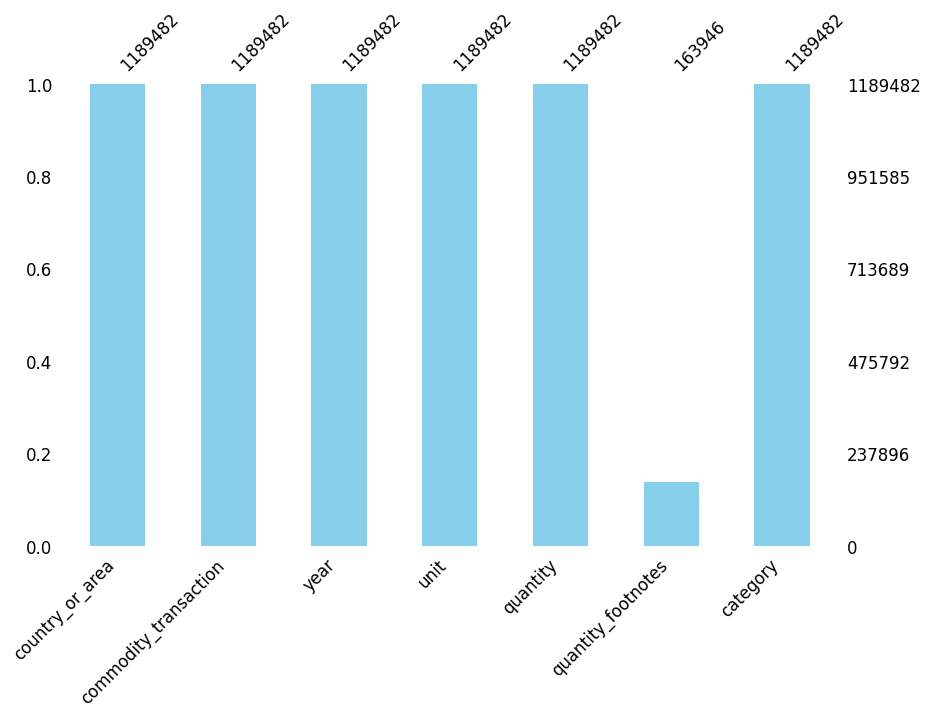

In [18]:
import pandas as pd
df = pd.read_csv('/kaggle/input/international-energy-statistics/all_energy_statistics.csv')

# İlk birkaç satırı kontrol edelim
print(df.head())
import missingno as msno
import matplotlib.pyplot as plt

# Eksik veri görselleştirelim
msno.bar(df=df, figsize=(10, 6), fontsize=12, color="skyblue")

# Grafiği gösterelim
plt.show()

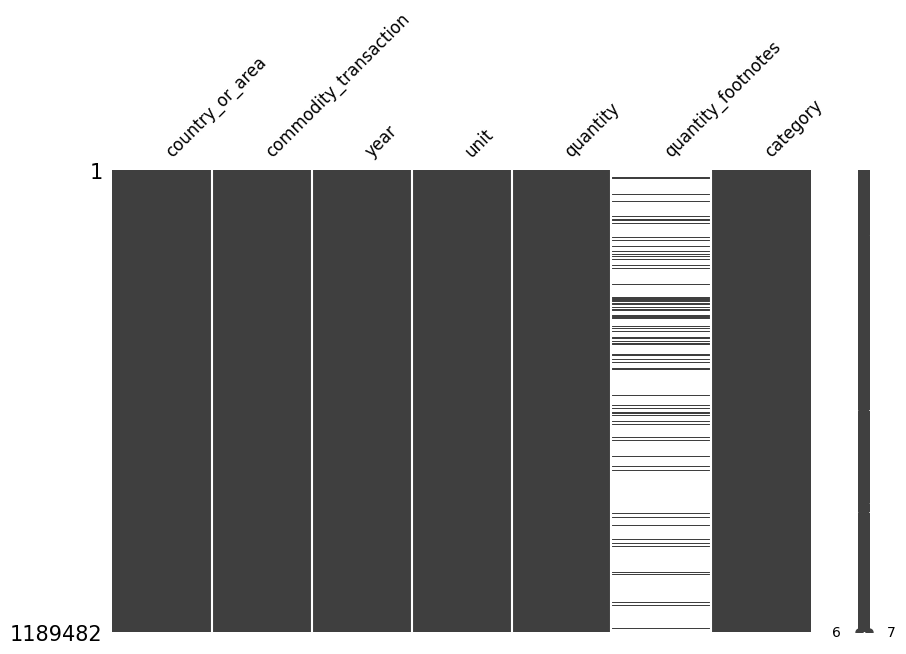

In [19]:
msno.matrix(df=df, figsize=(10, 6), fontsize=12)
plt.show()

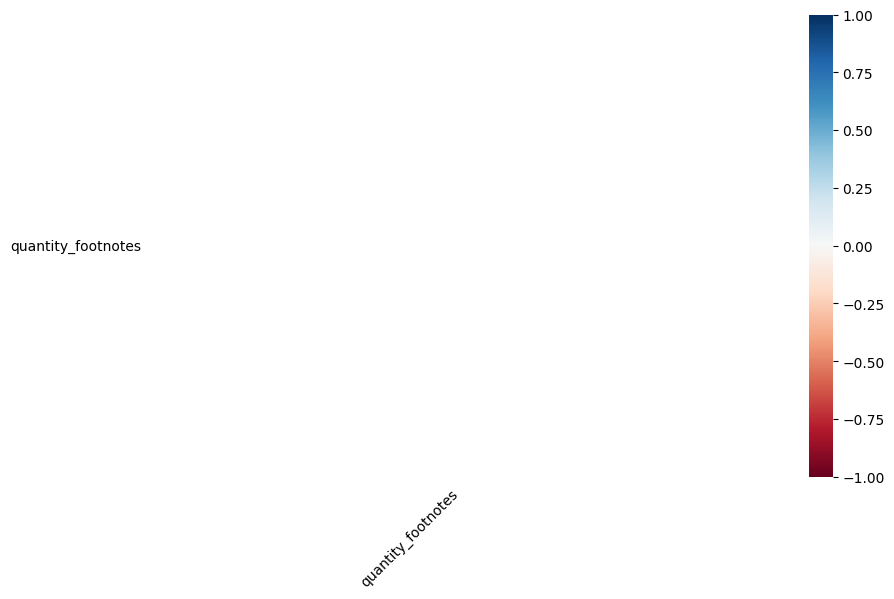

In [20]:
msno.heatmap(df=df,figsize= (10,6), fontsize= 10); #bir nevi korelasyon

# 4.  Eksik Verilerin Silinmesi

In [21]:
df.dropna(inplace= False)[:5] #verideki eksik değerleri geçici olarak kaldırır

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
622,Colombia,Additives and Oxygenates - Production,2014,"Metric tons, thousand",34.53,1.0,additives_and_oxygenates
1369,Colombia,Additives and Oxygenates - Total energy supply,2014,"Metric tons, thousand",34.53,1.0,additives_and_oxygenates
1886,Colombia,Additives and Oxygenates - transfers and recyc...,2014,"Metric tons, thousand",34.53,1.0,additives_and_oxygenates
2250,Jordan,Additives and Oxygenates - Transformation,2014,"Metric tons, thousand",103.00,1.0,additives_and_oxygenates
2251,Jordan,Additives and Oxygenates - Transformation,2013,"Metric tons, thousand",101.00,1.0,additives_and_oxygenates


In [22]:
df.dropna(how= 'all')[:5] #sadece bütün değerleri eksik olan bir gözlemi silmek istersek

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [23]:
df.dropna(axis=1) #eksik veriye sahip sütunları kaldırır

,country_or_area,commodity_transaction,year,unit,quantity,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,additives_and_oxygenates
...,...,...,...,...,...,...
1189477,Viet Nam,Electricity - total wind production,2012,"Kilowatt-hours, million",92.0,wind_electricity
1189478,Viet Nam,Electricity - total wind production,2011,"Kilowatt-hours, million",87.0,wind_electricity
1189479,Viet Nam,Electricity - total wind production,2010,"Kilowatt-hours, million",50.0,wind_electricity
1189480,Viet Nam,Electricity - total wind production,2009,"Kilowatt-hours, million",10.0,wind_electricity


In [24]:
# Eksik değerleri algılamak için kontrol
print("Eksik veriler kontrol ediliyor...")
df.replace("", float("NaN"), inplace=True)  # Boş stringleri NaN yap
df.replace(-1, float("NaN"), inplace=True)  # Özel eksiklikleri NaN yap

# Toplam hücre sayısı
total_cells = df.size

# Eksik değerlerin sayısı
missing_values = df.isnull().sum().sum()

# Eksik değerlerin yüzdesi
missing_rate = (missing_values / total_cells) * 100 if total_cells > 0 else 0

# Sonuçları yazdır
print(f"Toplam hücre sayısı: {total_cells}")
print(f"Toplam eksik değer sayısı: {missing_values}")
print(f"Eksik verilerin yüzdesi: {missing_rate:.2f}%")

Eksik veriler kontrol ediliyor...
Toplam hücre sayısı: 8326374
Toplam eksik değer sayısı: 1026982
Eksik verilerin yüzdesi: 12.33%


In [25]:
df_fillna = df.copy()
df_fillna.head(3) #veri setinin bir kopyasını doldurma işlemleri için oluşturdum.

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates


In [26]:
#veri çerçevesinde her sütunda kaç eksik (NaN) değer olduğunu gösterir veri çerçevesinde her sütunda kaç eksik (NaN) değer olduğunu görürüz.
df_fillna.isna().sum()

country_or_area                0
commodity_transaction          0
year                           0
unit                           0
quantity                    1446
quantity_footnotes       1025536
category                       0
dtype: int64

# 5. Sayısal Değişkenlerin Doldurulması

In [27]:
# Sayısal sütunları belirleme
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Eksik değerleri sütunların ortalamaları ile doldurma
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Kontrol etmek için ilk birkaç satırını görüntüleme
df.head()


,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,1.0,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,1.0,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,1.0,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,1.0,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,1.0,additives_and_oxygenates


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1189482.0,2002.851554,7.167345e+00,1990.0,1997.0,2003.0,2009.0,2.014000e+03
quantity,1189482.0,184489.046338,1.585663e+07,-864348.0,14.0,191.0,2297.0,6.680329e+09
quantity_footnotes,1189482.0,1.000000,0.000000e+00,1.0,1.0,1.0,1.0,1.000000e+00


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


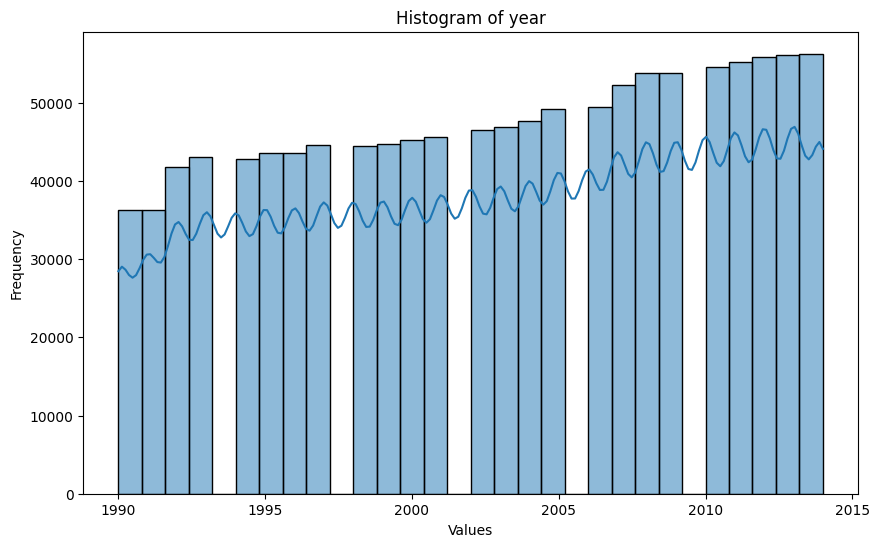

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


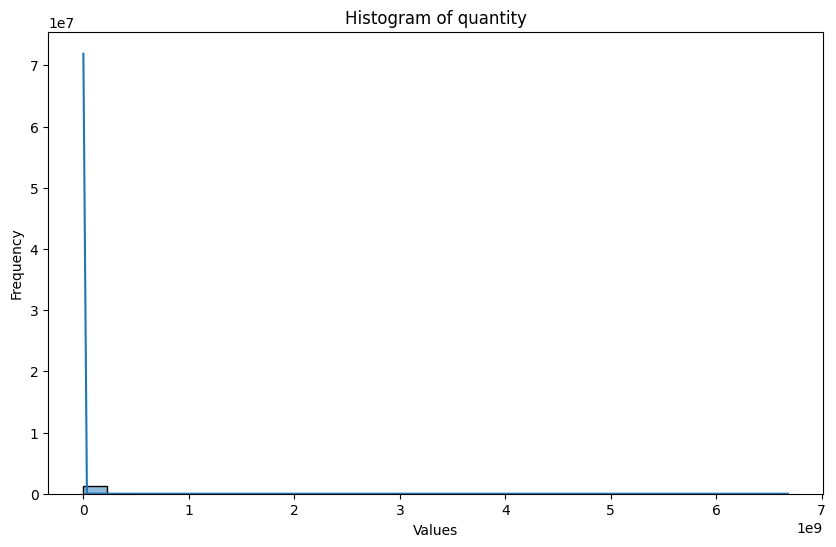

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


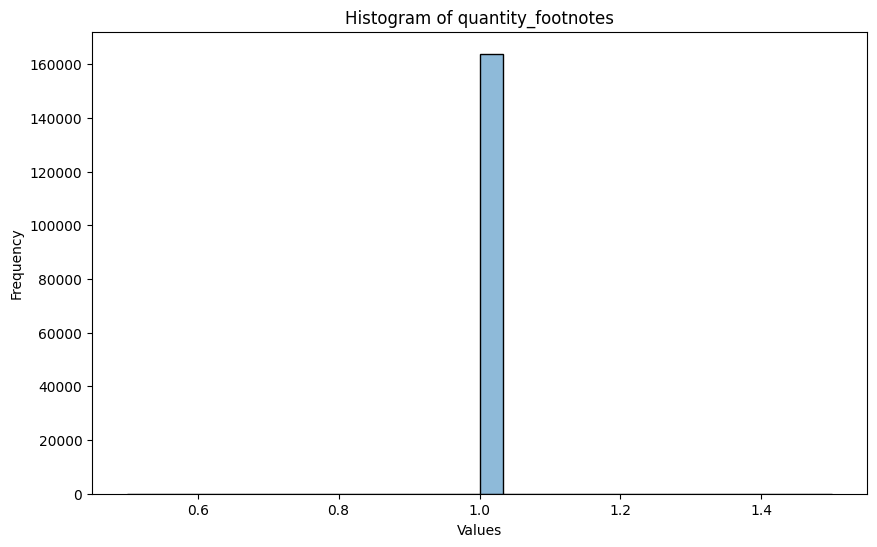

In [29]:
# Numerik sütunlar listesi 
numerical_features = df_fillna.select_dtypes(include=['number']).columns

# Her numerik sütun için histogram çizme
for col in numerical_features:
    plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlamak için
    sns.histplot(df_fillna[col], kde=True, bins=30)  # KDE ile histogram
    plt.title(f'Histogram of {col}')  # Başlık
    plt.xlabel('Values')  # X ekseni etiket
    plt.ylabel('Frequency')  # Y ekseni etiket
    plt.show()

# 6. Kategorik Değişkenlerin Doldurulması



In [30]:

print("Orijinal veri seti:")
print(df)

# 1. Kategorik sütunları belirleme
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Kategorik değişkenlerin mod ile doldurulması
for col in categorical_columns:
    mode_value = df[col].mode()[0]  # En çok tekrar eden değeri al
    df[col] = df[col].fillna(mode_value)

# 2. Sayısal sütunları belirleme
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Sayısal değişkenlerin ortalama ile doldurulması
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

print("\nEksik değerler doldurulmuş veri seti:")
print(df)


Orijinal veri seti:
        country_or_area                commodity_transaction  year  \
0               Austria   Additives and Oxygenates - Exports  1996   
1               Austria   Additives and Oxygenates - Exports  1995   
2               Belgium   Additives and Oxygenates - Exports  2014   
3               Belgium   Additives and Oxygenates - Exports  2013   
4               Belgium   Additives and Oxygenates - Exports  2012   
...                 ...                                  ...   ...   
1189477        Viet Nam  Electricity - total wind production  2012   
1189478        Viet Nam  Electricity - total wind production  2011   
1189479        Viet Nam  Electricity - total wind production  2010   
1189480        Viet Nam  Electricity - total wind production  2009   
1189481        Viet Nam  Electricity - total wind production  2008   

                            unit  quantity  quantity_footnotes  \
0         Metric tons,  thousand       5.0                 1.0   
1      

In [31]:
df_fillna["commodity_transaction"].fillna(method = "bfill")

/tmp/ipykernel_17/2007046586.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fillna["commodity_transaction"].fillna(method = "bfill")


0           Additives and Oxygenates - Exports
1           Additives and Oxygenates - Exports
2           Additives and Oxygenates - Exports
3           Additives and Oxygenates - Exports
4           Additives and Oxygenates - Exports
                          ...                 
1189477    Electricity - total wind production
1189478    Electricity - total wind production
1189479    Electricity - total wind production
1189480    Electricity - total wind production
1189481    Electricity - total wind production
Name: commodity_transaction, Length: 1189482, dtype: object

In [32]:
# Sonraki değer ile doldurma işlemi
df_fillna["commodity_transaction"].fillna(method = "ffill")

/tmp/ipykernel_17/4152976679.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fillna["commodity_transaction"].fillna(method = "ffill")


0           Additives and Oxygenates - Exports
1           Additives and Oxygenates - Exports
2           Additives and Oxygenates - Exports
3           Additives and Oxygenates - Exports
4           Additives and Oxygenates - Exports
                          ...                 
1189477    Electricity - total wind production
1189478    Electricity - total wind production
1189479    Electricity - total wind production
1189480    Electricity - total wind production
1189481    Electricity - total wind production
Name: commodity_transaction, Length: 1189482, dtype: object

In [33]:
# Eksik değerlerin doldurulduğu hücreleri bul
filled_mask = df.isna() & ~df_filled.isna()

# Sadece doldurulan hücreleri göster
for col in filled_mask.columns:
    print(f"{col} sütununda doldurulan hücreler:")
    print(df_filled[col][filled_mask[col]])




NameError: name 'df_filled' is not defined

# 7. Kategorik Değişken Analizi

In [ ]:
df = df.copy()
df.info()

In [ ]:
# Kategorik değişkenlere ilk bakış
df_categorical = df.select_dtypes(include = "object")
df_categorical.head(3)

In [ ]:
# Kategorik bir değişkendeki benzersiz değerleri gözlemlemek için unique() kullanabiliriz.
df_categorical["commodity_transaction"].unique()

In [ ]:
# Kategorik değişkenlerdeki benzersiz değerlerin sayısını görebilmek için nunique() kullanabiliriz.
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

In [ ]:
# Her bir kategorik değişken için toplam gözlem sayısını value_counts() ile buluyoruz.
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

In [ ]:
# Kategorik bir değişkende bulunan kategorik değerleri bir liste haline getirip sonra kullanabiliriz.
comp_categories = df["commodity_transaction"].unique().tolist()[::-1]
comp_categories

In [ ]:
# Ordinal değişken nasıl oluşturulur?
from pandas.api.types import CategoricalDtype

df["company_size"] = df["commodity_transaction"].astype(CategoricalDtype(categories = comp_categories, ordered = True))
df["company_size"].head()

**astype('category')** 

Bu yöntem, bir sütunu doğrudan kategori türüne dönüştürmek için kullanılır.

**CategoricalDtype** 

Bu yöntem, kategoriler üzerinde daha fazla kontrol sağlar. Örneğin:


* Kategorilerin sıralamasını belirtebilirsiniz.
* Kullanılacak kategorileri manuel olarak tanımlayabilirsiniz.


In [ ]:
#Kullanacağımız kütüphaneleri yükleyelim.
import pandas as pd
import numpy as np
df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/international-energy-statistics/all_energy_statistics.csv")

#görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns
df['unit'].value_counts().plot.barh();

In [ ]:
#her bir kategori için gözlem sayısını, en çok görülen kategoriden en az görülen kategoriye doğru sıralı bir şekilde sıralayım.
sns.countplot(data = df,
              y = "unit",
              hue = "unit",
              order = df["unit"].value_counts().index,
              palette = "Set1");

In [ ]:
#çubuk grafiğiyle veriy inceleyelim.
sns.barplot(data = df, x = "unit", y = df.unit.index);

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/international-energy-statistics/all_energy_statistics.csv")
df = df_.copy()
# catplot görselleştirme
sns.catplot(data=df, 
            x="category", 
            y="quantity", 
            kind="box",  # Çubuk grafik yerine kutu grafiği, alternatif: kind="bar"
            aspect=5, 
            height=10)

# Grafik başlığı ve eksen düzenlemeleri
plt.title("Kategoriye Göre İşlem Miktarları")
plt.xlabel("Kategori")
plt.ylabel("Miktar")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Barplot oluşturma
plt.figure(figsize=(15, 8))
sns.barplot(data=df,
            x="category",  # Kategorik değişken
            y="quantity",  # Sayısal değişken
            hue="commodity_transaction",  # Gruplandırma için kategorik değişken
            palette="Set2")

# Grafik başlığı ve eksen düzenlemeleri
plt.title("Kategoriye ve İşlem Türüne Göre Miktarlar", fontsize=16)
plt.xlabel("Kategori", fontsize=14)
plt.ylabel("Miktar", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="İşlem Türü")
plt.show()


**Kategorik Gruplama (groupby) İşlemleri** 

In [ ]:
df_numerical.describe().T


In [ ]:

# Kategorilere göre toplam miktar
category_group = df_.groupby('category')['quantity'].sum()

print(category_group)


In [ ]:
# Ülkelere göre ortalama miktar
country_avg = df_.groupby('country_or_area')['quantity'].mean()

print(country_avg)


In [ ]:
# Yıllara göre toplam miktar
yearly_sum = df_.groupby('year')['quantity'].sum()

print(yearly_sum)


In [ ]:
# Ülke ve kategori bazında toplam miktar
multi_group = df_.groupby(['country_or_area', 'category'])['quantity'].sum()

print(multi_group)


In [ ]:
# Kategorilere göre toplam miktarı büyükten küçüğe sıralama
sorted_category = df_.groupby('category')['quantity'].sum().sort_values(ascending=False)

print(sorted_category)


In [ ]:
# Gruplama ile toplam ve ortalama hesaplama
group_stats = df_.groupby('category')['quantity'].agg(['sum', 'mean'])

print(group_stats)


In [ ]:
# Belirli bir ülke için yıllık toplam
country_yearly = df_[df_['country_or_area'] == 'Austria'].groupby('year')['quantity'].sum()

print(country_yearly)


In [ ]:
# Her kategori için en yüksek işlem miktarı
max_per_category = df_.groupby('category')['quantity'].max()

print(max_per_category)


In [ ]:
    
give_stats(dataframe = df)

In [ ]:
import matplotlib.pyplot as plt

# Yıllara göre toplam miktarı görselleştirme
yearly_sum = df_.groupby('year')['quantity'].sum()
yearly_sum.plot(kind='bar', figsize=(12, 6), title="Yıllara Göre Toplam Miktar")

plt.show()


In [ ]:
# kdeplot ise ilgili numerik değişkenin yoğunluğunu gösterir.
sns.kdeplot(df['quantity'], fill = True);

# 8. Sürekli Değişken Analizi

In [ ]:
# Veri setindeki numerik kolonları seçmek için aşağıdaki yapıyı kullanabiliriz.

df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

In [ ]:
df_numerical.describe().T

In [ ]:
# Bir veri setindeki numerik kolonların istatistiksel bilgilerine erişmek için basitçe bu tarz bir fonksiyon yazabiliriz.

def give_stats(dataframe: pd.DataFrame) -> None:
    """Prints statistical information for numerical columns.

    Args:
        dataframe (pd.DataFrame): DataFrame object.
    
    Return:
        None
    
    """

    num_df = dataframe.select_dtypes(include = ["float", "int"])

    for col in num_df.columns:
        print(f"**********{col}**********")
        print(f"Mean value of {col} is {num_df[col].mean():.2f}")
        print(f"Std value of {col} is {num_df[col].std():.2f}")
        print(f"Max value of {col} is {num_df[col].max()}")
        print(f"Min value of {col} is {num_df[col].min()}")
        print(f"Count value of {col} is {num_df[col].count()}")
        print(f"Median value of {col} is {num_df[col].median()}\n")
    
    


In [ ]:
give_stats(dataframe = df)

In [ ]:
#Yoğunluk dağılımını görmek için KDE grafiğini kullanabiliriz.
sns.kdeplot(df['quantity'], fill=True, color="green", alpha=0.5)
plt.title("Miktar Yoğunluk Dağılımı", fontsize=16)
plt.xlabel("Miktar", fontsize=14)
plt.ylabel("Yoğunluk", fontsize=14)
plt.show()



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sadece sayısal sütunları seç
numeric_df = df.select_dtypes(include=['float', 'int'])

# Eksik değerleri temizle
numeric_df = numeric_df.dropna()  # Tüm eksik değer içeren satırları sil

# Korelasyon matrisini oluştur
correlation_matrix = numeric_df.corr()

# Korelasyon matrisini görselleştir
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi", fontsize=16)
plt.show()


In [ ]:
pivot_table = df.pivot_table(values='quantity', index='category', columns='year', aggfunc='mean')
print(pivot_table)


In [ ]:
sns.scatterplot(data=df, x='quantity', y='quantity_footnotes', hue='category', alpha=0.7)
plt.title("Miktar ve Dipnot Miktarları Arasındaki İlişki", fontsize=16)
plt.xlabel("Miktar", fontsize=14)
plt.ylabel("Dipnot Miktarları", fontsize=14)
plt.legend(title="Kategori")
plt.show()


Değerler çok geniş bir aralıkta dağılmış halde. Daha anlamlı bir grafik için  logaritmik dönüşüm grafiği daha okunabilir hale getirebilir:

In [ ]:
import numpy as np

# Logaritmik dönüşüm
df['quantity_log'] = np.log1p(df['quantity'])
df['quantity_footnotes_log'] = np.log1p(df['quantity_footnotes'])

# Logaritmik dönüşümle scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='quantity_log', y='quantity_footnotes_log', hue='category', alpha=0.7)
plt.title("Miktar ve Dipnot Miktarları Arasındaki İlişki (Logaritmik)", fontsize=16)
plt.xlabel("Logaritmik Miktar", fontsize=14)
plt.ylabel("Logaritmik Dipnot Miktarları", fontsize=14)
plt.legend(title="Kategori", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Eğer çok fazla kategori grafiği karmaşıklaştırıyor, sadece en büyük veya en önemli kategorileri seçelim ve en küçük kategorileri seçip karşılaştıralım. Bu, grafik karmaşıklığını azaltır ve odaklanmayı kolaylaştırır.

In [ ]:
# En büyük 10 kategori
top_10_categories = df.groupby('category')['quantity'].sum().nlargest(10).index
df_top_10 = df[df['category'].isin(top_10_categories)]

# En küçük 10 kategori
bottom_10_categories = df.groupby('category')['quantity'].sum().nsmallest(10).index
df_bottom_10 = df[df['category'].isin(bottom_10_categories)]

# En büyük ve en küçük kategorileri birleştirme
df_comparison = pd.concat([df_top_10, df_bottom_10])
df_comparison['Category Type'] = df_comparison['category'].apply(
    lambda x: 'Top 10' if x in top_10_categories else 'Bottom 10'
)

# Scatterplot
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=df_comparison, 
    x='quantity_log', 
    y='quantity_footnotes_log', 
    hue='Category Type', 
    style='category', 
    alpha=0.7, 
    palette={"Top 10": "blue", "Bottom 10": "red"}
)
plt.title("En Büyük ve En Küçük 10 Kategorinin Karşılaştırması (Logaritmik)", fontsize=16)
plt.xlabel("Logaritmik Miktar", fontsize=14)
plt.ylabel("Logaritmik Dipnot Miktarları", fontsize=14)
plt.legend(title="Kategori Türü ve Kategoriler", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Daha iyi bir değerlendirme için en büyük 10 kategoriyle en küçük 10 kategoriye daha detaylı bakalım.

In [ ]:
# Ortalama değerlerin hesaplanması
top_mean = df_top_10['quantity_log'].mean()
bottom_mean = df_bottom_10['quantity_log'].mean()

# Barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=["Top 10", "Bottom 10"], y=[top_mean, bottom_mean], palette=["blue", "red"])
plt.title("En Büyük ve En Küçük 10 Kategorinin Ortalama Logaritmik Miktarı", fontsize=16)
plt.xlabel("Kategori Türü", fontsize=14)
plt.ylabel("Ortalama Logaritmik Miktar", fontsize=14)
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
sns.stripplot(data=df_comparison, x="Category Type", y="quantity_log", palette={"Top 10": "blue", "Bottom 10": "red"})
plt.title("En Büyük ve En Küçük 10 Kategorinin Logaritmik Miktar Karşılaştırması", fontsize=16)
plt.xlabel("Kategori Türü", fontsize=14)
plt.ylabel("Logaritmik Miktar", fontsize=14)
plt.show()


In [ ]:
# Eğer 'quantity' üzerine yoğunlaşmak istiyorsanız:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_comparison, x="Category Type", y="quantity_log", palette={"Top 10": "blue", "Bottom 10": "red"})
plt.title("En Büyük ve En Küçük 10 Kategorinin Logaritmik Miktar Karşılaştırması", fontsize=16)
plt.xlabel("Kategori Türü", fontsize=14)
plt.ylabel("Logaritmik Miktar", fontsize=14)
plt.show()



**Violin plot:**
- Her bir kategori için miktarların yoğunluğunu (density) görselleştirir.
- Kutu grafiği (boxplot) gibi medyan ve çeyrekler (quartiles) gibi temel istatistiksel bilgileri içerir.
- Ayrıca dağılımın şeklini (asimetrik veya simetrik) ve uç değerleri (outliers) de görmeyi sağlar.



In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # FutureWarning mesajlarını kapat

# En büyük 10 kategoriyi seç
top_10_categories = df.groupby('category')['quantity'].sum(numeric_only=True).nlargest(10).index
df_top_10 = df[df['category'].isin(top_10_categories)]

# En küçük 10 kategoriyi seç
bottom_10_categories = df.groupby('category')['quantity'].sum(numeric_only=True).nsmallest(10).index
df_bottom_10 = df[df['category'].isin(bottom_10_categories)]

# Yıllık toplamları hesapla
top_10_trend = df_top_10.groupby(['year', 'category'])['quantity'].sum(numeric_only=True).reset_index()
bottom_10_trend = df_bottom_10.groupby(['year', 'category'])['quantity'].sum(numeric_only=True).reset_index()

# En büyük 10 kategori için yıllık değişim
plt.figure(figsize=(15, 8))
sns.lineplot(data=top_10_trend, x='year', y='quantity', hue='category', palette='tab10')
plt.title("En Büyük 10 Kategorinin Yıllık Miktar Değişimi", fontsize=16)
plt.xlabel("Yıl", fontsize=14)
plt.ylabel("Miktar", fontsize=14)
plt.legend(title="Kategori", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# En küçük 10 kategori için yıllık değişim
plt.figure(figsize=(15, 8))
sns.lineplot(data=bottom_10_trend, x='year', y='quantity', hue='category', palette='tab10')
plt.title("En Küçük 10 Kategorinin Yıllık Miktar Değişimi", fontsize=16)
plt.xlabel("Yıl", fontsize=14)
plt.ylabel("Miktar", fontsize=14)
plt.legend(title="Kategori", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:

df_top_10 = df_top_10.copy()

# Yüzdelik değişim hesaplayalım
df_top_10['percentage_change'] = df_top_10.groupby('category')['quantity'].pct_change() * 100

# Yüzdelik değişimi görselleştirme
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_top_10, x='year', y='percentage_change', hue='category', palette='tab10')
plt.title("En Büyük 10 Kategorinin Yıllık Yüzdelik Değişimi", fontsize=16)
plt.xlabel("Yıl", fontsize=14)
plt.ylabel("Yüzdelik Değişim (%)", fontsize=14)
plt.legend(title="Kategori", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=top_10_trend, x='year', y='quantity', hue='category', palette='tab10')
plt.yscale('log')
plt.title("En Büyük 10 Kategorinin Yıllık Logaritmik Trend Analizi", fontsize=16)
plt.show()


In [ ]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Negatif ve NaN değerleri temizleme
df = df[df['quantity'] >= 0]
df = df.dropna(subset=['quantity'])

# Logaritmik dönüşüm
df['quantity_log'] = np.log1p(df['quantity'])

# `category` sütununun doğru türde olduğundan emin olun
if df['category'].dtype != 'category':
    df['category'] = df['category'].astype('category')

# Violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=df, x="category", y="quantity_log", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Kategorilere Göre Miktar Dağılımı (Logaritmik)", fontsize=16)
plt.xlabel("Kategori", fontsize=14)
plt.ylabel("Logaritmik Miktar", fontsize=14)
plt.xticks(rotation=90)  # Etiketleri 90 derece döndür
plt.show()



Logaritmik dönüşüm (logarithmic scale):
- Veride çok büyük ve çok küçük değerlerin dengesizliğini azaltmak için kullanılmıştır.
- Bu dönüşüm, büyük değerlerin etkisini küçültür ve dağılımların daha dengeli bir şekilde görünmesini sağlar.

Grafik, kategorilere göre miktarların (quantity) dağılımını karşılaştırmayı ve kategori bazında hangi grupların daha yüksek veya düşük değerlere sahip olduğunu anlamayı kolaylaştırır.

#  9. Aykırı Değer Analizi

In [ ]:
sns.boxplot(data=df, x='quantity', color="orange")
plt.title("Miktar için Kutu Grafiği", fontsize=14)
plt.xlabel("Miktar", fontsize=10)
plt.show()


Daha anlamlı bir grafik için logaritmik kutu grafiği yapalım.

In [ ]:
# Miktar sütununda logaritmik dönüşüm
df['quantity_log'] = np.log1p(df['quantity'])  # Log(1 + x) dönüşümü

# Logaritmik dönüşüm sonrası kutu grafiği
sns.boxplot(data=df, x='quantity_log', color="orange")
plt.title("Logaritmik Miktar için Kutu Grafiği", fontsize=14)
plt.xlabel("Logaritmik Miktar", fontsize=10)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/international-energy-statistics/all_energy_statistics.csv")
df = df_.copy()
# Veri setindeki sütunları kontrol etme
print("Veri setindeki sütunlar:")
print(df.columns)

# Örnek: 'quantity' sütununu seçme
if 'quantity' in df.columns:
    df_quantity = df['quantity']
    print("\n'quantity' sütununun ilk 5 değeri:")
    print(df_quantity.head())
else:
    print("\n'quantity' sütunu veri setinde bulunamadı.")

# Örnek: 'quantity_footnotes' sütununu seçme
if 'quantity_footnotes' in df.columns:
    df_quantity_footnotes = df['quantity_footnotes']
    print("\n'quantity_footnotes' sütununun ilk 5 değeri:")
    print(df_quantity_footnotes.head())
else:
    print("\n'quantity_footnotes' sütunu veri setinde bulunamadı.")


In [ ]:
# Analiz için 'quantity' sütununu seçme
df_quantity = df['quantity']

# Quantile değerlerin belirlenmesi
Q1 = df_quantity.quantile(0.25)  # İlk çeyreklik (Q1)
Q3 = df_quantity.quantile(0.75)  # Üçüncü çeyreklik (Q3)

print("İlk Çeyreklik (Q1):", Q1)
print("Üçüncü Çeyreklik (Q3):", Q3)

# IQR (Interquartile Range) değerinin belirlenmesi
IQR = Q3 - Q1
print("IQR (Çeyrekler Arası Aralık):", IQR)

# Alt ve üst sınırların belirlenmesi
lower_fence = Q1 - 1.5 * IQR  # Alt sınır
upper_fence = Q3 + 1.5 * IQR  # Üst sınır

print("Alt Sınır (Lower Fence):", lower_fence)
print("Üst Sınır (Upper Fence):", upper_fence)

# Aşırı değerlerin (outliers) belirlenmesi
outliers = df_quantity[(df_quantity < lower_fence) | (df_quantity > upper_fence)]
print("\nAşırı Değerler (Outliers):")
print(outliers)


In [ ]:
# Upper_fence üzerinde kalan aykırı gözlemlerin index değerlerini, daha sonra kullanmak üzere bir değişkende tutabiliriz.
outlier_idx = df_quantity[df_quantity > upper_fence].index

outlier_idx

In [ ]:
df_quantity[df_quantity > upper_fence]

In [ ]:
#Aykırı Gözlemlerin Silinmesi
df_del = df[~(df_quantity > upper_fence)]

df_del

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df_del["quantity"],
            orient = "v");

Büyük bir veri aralığıyla uğraştığımızdan logaritmik bir grafik daha etkili bir sonuç verecektir.

In [ ]:
# Logaritmik dönüşüm
df_del["quantity_log"] = np.log1p(df_del["quantity"])  # log(1 + x) kullanıyoruz

# Log dönüşümlü boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_del, y="quantity_log", orient="v", color="orange")
plt.title("Logaritmik Miktar için Kutu Grafiği", fontsize=14)
plt.ylabel("Logaritmik Miktar", fontsize=12)
plt.show()


**AYKIRI GÖZLEMLERİN DOLDURULMASI**

**Ortalama Değer ile Doldurma**

In [ ]:
df.loc[df_quantity > upper_fence, "quantity"] = df_quantity.mean()

In [ ]:
df.loc[df_quantity > upper_fence, "quantity"]

In [ ]:
# Logaritmik dönüşüm uygulama
df_del["salary_in_usd_log"] = np.log1p(df_del["quantity"])  # log(1 + x) dönüşümü

# Log dönüşümlü boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_del, y="quantity_log", orient="v", color="orange")
plt.title("Logaritmik Quantity için Kutu Grafiği", fontsize=14)
plt.ylabel("Logaritmik Quantity", fontsize=12)
plt.show()


****

**Baskılama Yöntemi**

Baskılama yöntemi (Capping), veri analitiği ve veri ön işleme süreçlerinde kullanılan bir yöntemdir ve genellikle aşırı değerlerin (outliers) etkisini azaltmak veya kontrol altına almak için uygulanır. Bu yöntem, verideki aşırı değerleri belirli bir sınırla değiştirerek, onların analiz üzerindeki etkilerini sınırlamayı amaçlar.

In [ ]:
# Quantile değerlerin hesaplanması
Q1 = df['quantity'].quantile(0.25)
Q3 = df['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Alt ve üst sınırların belirlenmesi
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Baskılama yöntemi ile aşırı değerlerin sınırlanması
df['quantity_capped'] = df['quantity'].clip(lower=lower_fence, upper=upper_fence)

# Sonuçların karşılaştırılması
print("Orijinal Verilerdeki Min-Max:")
print(df['quantity'].min(), "-", df['quantity'].max())

print("\nBaskılanmış Verilerdeki Min-Max:")
print(df['quantity_capped'].min(), "-", df['quantity_capped'].max())


In [ ]:
# Logaritmik dönüşüm uygulama
df_del["quantity_log"] = np.log1p(df_del["quantity"])  # log(1 + x) dönüşümü

# Log dönüşümlü boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_del, y="quantity_log", orient="v", color="orange")
plt.title("Logaritmik Quantity için Kutu Grafiği", fontsize=14)
plt.ylabel("Logaritmik Quantity", fontsize=12)
plt.show()


**Local Outlier Factor (LOF)**
Local Outlier Factor (LOF), bir veri kümesindeki aykırı değerleri tespit etmek için kullanılan bir densite tabanlı (yoğunluk temelli) yöntemdir. Aykırı değer analizi, makine öğrenmesi, veri temizleme ve anormallik tespiti gibi birçok alanda önemlidir. LOF yöntemi, her veri noktasını komşularıyla kıyaslayarak lokal yoğunluk farklılıklarını ölçer ve bu sayede aykırı değerleri tespit eder.

**LOF Nasıl Çalışır?**

**1.**  Yoğunluk Temelli Analiz: LOF, bir veri noktasının çevresindeki (komşularındaki) yoğunluğu hesaplar.
Eğer bir veri noktası, komşularına kıyasla daha düşük bir yoğunluğa sahipse, bu nokta bir aykırı değer olarak değerlendirilir.

**2.** Komşuların Belirlenmesi: Her veri noktasının çevresindeki k komşu belirlenir (genellikle n_neighbors ile belirlenir).
Komşular, mesafeye dayalı olarak seçilir (örneğin, Euclidean mesafesi).

**3.:** LOF Skoru: Her veri noktasına bir LOF skoru atanır:
LOF Skoru ≈ 1: Normal (yoğunluk açısından benzer).
LOF Skoru > 1: Aykırı (komşularına göre daha düşük yoğunlukta).
LOF Skoru < 1: Komşularından daha yüksek yoğunlukta (genelde nadirdir).

**4.** Aykırı Değer Tespiti: LOF sonucu -1 (aykırı) ve 1 (normal) olarak sınıflandırılır.
Ayrıca negatif LOF skorları, aykırılık derecesini ifade eder (daha düşük skor, daha güçlü aykırılık).


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd

# Ensure the data is clean before applying LOF
# Drop rows with NaN or infinite values
df_clean = df.replace([float("inf"), -float("inf")], pd.NA).dropna()

# Select numerical columns for LOF
numerical_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns
numerical_data = df_clean[numerical_columns]

# Apply Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df_clean['LOF_Score'] = lof.fit_predict(numerical_data)

# Separate outliers and inliers
outliers = df_clean[df_clean['LOF_Score'] == -1]
inliers = df_clean[df_clean['LOF_Score'] == 1]

# Display the results
outliers_count = outliers.shape[0]
print(f"Number of outliers detected: {outliers_count}")
print("Outliers:")
print(outliers)

# Save the cleaned dataset with LOF scores
df_clean.to_csv("lof_results.csv", index=False)
print("The dataset with LOF scores has been saved as 'lof_results.csv'.")






In [ ]:
# Gerekli kütüphaneleri yükleyin
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
import matplotlib.pyplot as plt

# Veri hazırlığı: NaN ve sonsuz değerleri temizle
df = df.replace([np.inf, -np.inf], np.nan)  # Sonsuz değerleri NaN ile değiştir
df_cleaned = df.dropna()  # NaN içeren satırları kaldır

# 'quantity_scaled' sütununu oluştur
df_cleaned['quantity_scaled'] = (df_cleaned['quantity'] - df_cleaned['quantity'].mean()) / df_cleaned['quantity'].std()

# Local Outlier Factor modeliyle aykırı değer tespiti
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_predictions = lof.fit_predict(df_cleaned[['quantity', 'quantity_scaled']])
lof_scores = lof.negative_outlier_factor_

# LOF skorlarını ve tahminleri veri setine ekle
df_cleaned['LOF_Score'] = lof_predictions
df_cleaned['LOF_Factor'] = lof_scores

# Scatter plot ile LOF sonuçlarını görselleştirme
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_cleaned,
    x='quantity',
    y='quantity_scaled',
    hue='LOF_Score',
    palette={-1: 'red', 1: 'blue'},
    alpha=0.7
)
plt.title("Local Outlier Factor Sonuçlarının Dağılımı", fontsize=16)
plt.xlabel("Miktar", fontsize=14)
plt.ylabel("Ölçeklendirilmiş Miktar", fontsize=14)
plt.legend(title="LOF Skorları", loc='upper right')
plt.show()

# LOF sonuçlarının özetini yazdır
outlier_count = sum(df_cleaned['LOF_Score'] == -1)
print(f"Number of outliers detected: {outlier_count}")
print("Outliers:")
print(df_cleaned[df_cleaned['LOF_Score'] == -1].head())

# Sonuçları bir CSV dosyasına kaydet
df_cleaned.to_csv('lof_results.csv', index=False)
print("LOF sonuçları 'lof_results.csv' dosyasına kaydedildi.")


# 10. Eksik Veri Oluşturma

In [ ]:
import pandas as pd
import numpy as np

df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/international-energy-statistics/all_energy_statistics.csv")
df = df_.copy()
# CSV dosyasını oku ve bir DataFrame'e aktar
df = pd.read_csv("/kaggle/input/international-energy-statistics/all_energy_statistics.csv")

print("Orijinal veri seti:")
print(df)




In [ ]:
import pandas as pd
import numpy as np

print("Orijinal veri seti:")
print(df.head())

# Eksik veri eklemek için fonksiyon
def create_missing_values(df, missing_rate=0.1):
    """
    Veri setinde rastgele eksik veriler oluşturur.
    
    Parametreler:
    df: DataFrame - Veri seti
    missing_rate: float - Eksik veri oranı (0 ile 1 arasında)
    
    Dönen Değer:
    DataFrame - Eksik veriler eklenmiş veri seti
    """
    if not (0 <= missing_rate <= 1):
        raise ValueError("Eksik veri oranı 0 ile 1 arasında olmalıdır.")
    if df.empty:
        raise ValueError("Veri seti boş. Eksik veri oluşturulamıyor.")
    
    df_copy = df.copy()
    
    # Toplam hücre sayısını hesapla
    total_cells = df_copy.size
    
    # Eksik olacak hücre sayısını belirle
    num_missing = int(total_cells * missing_rate)
    
    for _ in range(num_missing):
        i = np.random.randint(0, df_copy.shape[0])  # Rastgele satır
        j = np.random.randint(0, df_copy.shape[1])  # Rastgele sütun
        df_copy.iat[i, j] = np.nan  # Eksik veri ata
    
    return df_copy

# Eksik veri ekle
missing_rate = 0.2  # Eksik veri oranı %20
df_with_missing = create_missing_values(df, missing_rate=missing_rate)

print("\nEksik veriler eklenmiş veri seti:")
print(df_with_missing.head())


#  11. Feature Engineering

In [ ]:
df.head()

In [ ]:
print("Veri Seti Özeti:")
print(df.info())

print("\nSayısal Özellikler:")
print(df.describe())

print("\nKategorik Özellikler:")
print(df.select_dtypes(include=['object']).nunique())


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standartlaştırma
scaler = StandardScaler()
df["quantity_scaled"] = scaler.fit_transform(df[["quantity"]])

# Normalize etme
normalizer = MinMaxScaler()
df["quantity_normalized"] = normalizer.fit_transform(df[["quantity"]])

# İlk birkaç satırı görüntüleme
print("Standartlaştırılmış ve Normalize Edilmiş Veriler:")
print(df[["quantity", "quantity_scaled", "quantity_normalized"]].head())



In [ ]:
# Kategorik sütunları one-hot encoding ile dönüştürme
df_encoded = pd.get_dummies(df, columns=["category"], drop_first=True)

# İlk birkaç satırı görüntüleme
print("One-Hot Encoding Sonrası:")
print(df_encoded.head())


In [ ]:
# Frekans kodlama
category_freq = df["category"].value_counts()
df["category_freq"] = df["category"].map(category_freq)

# İlk birkaç satırı görüntüleme
print("Frekans Kodlama Sonrası:")
print(df[["category", "category_freq"]].head())


In [ ]:
# Medyan değer
quantity_median = df["quantity"].median()

# En yüksek değer
quantity_max = df["quantity"].max()

# En düşük değer
quantity_min = df["quantity"].min()

# Sonuçları yazdırma
print(f"Quantity Medyan Değeri: {quantity_median}")
print(f"Quantity En Yüksek Değeri: {quantity_max}")
print(f"Quantity En Düşük Değeri: {quantity_min}")


Büyük bir veriyle uğraştığımızdan örnek olarak Belçika'yı daha detaylı inceleyelim.

In [ ]:
# Belçika'ya ait verileri filtreleme
belgium_data = df[df["country_or_area"] == "Belgium"]

# Belçika için toplam quantity
belgium_total_quantity = belgium_data["quantity"].sum()

# Belçika'da segmentasyon için kriter tanımlama
def segment_quantity(value):
    if value < 5000:  # Düşük eşik
        return "Low"
    elif 5000 <= value < 20000:  # Orta aralık
        return "Medium"
    else:  # Yüksek eşik
        return "High"

# Belçika'daki segmentleri belirleme
belgium_data["quantity_segment"] = belgium_data["quantity"].apply(segment_quantity)

# Belçika'daki segmentlerin toplam miktarlarını hesaplama
segment_totals_belgium = belgium_data.groupby("quantity_segment")["quantity"].sum()

# Çıktılar
print(f"Belçika için Toplam Quantity: {belgium_total_quantity}")
print("\nBelçika'daki Segmentlere Göre Toplam Miktarlar:")
print(segment_totals_belgium)


# Belçika'ya ait tüm verileri görüntüleme
print("Belçika'ya Ait Tüm Veriler:")
print(belgium_data)



In [ ]:
# Quantity dağılımını görselleştirme
sns.histplot(belgium_data["quantity"], kde=True)
plt.title("Belçika'daki Quantity Dağılımı")
plt.xlabel("Quantity")
plt.ylabel("Frekans")
plt.show()


Bu grafikte negatif değerler de pozitif değerler de olduğundan daha detaylı bir inceleme yapalım.

* Negatif quantity değerleri, genellikle veri toplama hataları, işlem farklılıkları veya özel durumlar nedeniyle oluşabilir.
* Negatif ve pozitif değerleri ayırmak, verinin temizliğini ve anlamını incelemek için önemlidir.
* Belçika'nın enerji verilerindeki quantity değerlerini "Low", "Medium", "High" gibi segmentlere ayırarak farklı kategorileri karşılaştırmak istedim.
* Segmentasyon, hangi aralıkların Belçika için daha fazla önem taşıdığını ve hangi kategorilerin enerji üretimine veya tüketimine en çok katkı yaptığını anlamamızı sağlar.

In [ ]:
negative_values = belgium_data[belgium_data["quantity"] < 0]
print("Negatif Değerler:")
print(negative_values)


In [ ]:
# Negatif değerler
negative_values = belgium_data[belgium_data["quantity"] < 0]
print("Negatif Değerler:")
print(negative_values)

# Pozitif değerler
positive_values = belgium_data[belgium_data["quantity"] >= 0]
print("\nPozitif Değerler:")
print(positive_values)


In [ ]:
positive_values = belgium_data[belgium_data["quantity"] >= 0]
print("Pozitif Değerler:")
print(positive_values)


In [ ]:
# Segmentasyon fonksiyonu tanımlama
def segment_positive_quantity(value):
    if value < 1000:  # Düşük eşik
        return "Low"
    elif 1000 <= value < 5000:  # Orta aralık
        return "Medium"
    else:  # Yüksek eşik
        return "High"

# Pozitif değerler için segmentasyon sütunu oluşturma
positive_values["quantity_segment"] = positive_values["quantity"].apply(segment_positive_quantity)

# Segmentlere göre toplam miktarları hesaplama
positive_segment_totals = positive_values.groupby("quantity_segment")["quantity"].sum()

# Çıktılar
print("\nPozitif Değerler Segmentasyonu:")
print(positive_values[["quantity", "quantity_segment"]].head())

print("\nSegmentlere Göre Toplam Miktarlar:")
print(positive_segment_totals)


In [ ]:
# Segmentlere göre toplam miktarları görselleştirme
plt.figure(figsize=(8, 6))
positive_segment_totals.plot(kind="bar", color=["blue", "orange", "green"])
plt.title("Belçika'daki Pozitif Quantity Segmentlerine Göre Toplam Miktarlar", fontsize=14)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Toplam Quantity", fontsize=12)
plt.xticks(rotation=0)
plt.show()


Bu tür bir analiz, enerji verileriyle çalışan bir kuruluşun:

* Hangi kategorilere yatırım yapması gerektiğini,
* Hangi kategorilerde sorunların olduğunu anlamasına yardımcı olabilir.
Örnek tavsiye:
* Stratejik Analiz: High segmentteki kategorilerin detaylı bir analizi yapılarak, bu kategorilerin Belçika'nın enerji politikalarındaki önemi değerlendirilebilir.
* Verimlilik: Medium ve Low segmentlerde verimliliği artırabilecek potansiyel kategoriler tespit edilebilir.

**PCA (Principal Component Analysis - Temel Bileşen Analizi)**

PCA, boyut azaltma (dimensionality reduction) için kullanılan bir istatistiksel tekniktir. Verideki yüksek boyutluluğu (çok sayıda özellik veya sütun) daha düşük bir boyuta indirerek:

* Bilgi kaybını minimumda tutar,
* Analizi ve görselleştirmeyi kolaylaştırır,
* Hesaplama maliyetlerini düşürür,
* Overfitting riskini azaltır.
Özet: PCA, veriyi daha az sayıda yeni boyutlarda (temel bileşenler) temsil eder. Bu bileşenler, orijinal özelliklerin doğrusal kombinasyonlarından oluşur ve maksimum varyansı korur.



In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_data = df[numerical_columns].dropna()  # Drop NaNs for PCA

# Standardizing the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Applying PCA to retain 90% of the variance
pca = PCA(n_components=0.90)  # Retains components that explain 90% of variance
pca_data = pca.fit_transform(scaled_data)

# Creating a DataFrame for PCA-transformed data
pca_df = pd.DataFrame(pca_data, columns=[f"PCA_Component_{i+1}" for i in range(pca_data.shape[1])])

# Combine PCA components with the original DataFrame
final_df = pd.concat([df.reset_index(drop=True), pca_df], axis=1)

# Printing explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

# Display results
print(f"Explained variance by each component: {explained_variance}")
print(f"Total explained variance: {total_explained_variance:.2%}")

# Save or use the transformed data
final_df.to_csv("pca_transformed_data.csv", index=False)
print("PCA Transformed DataFrame saved as 'pca_transformed_data.csv'.")


**PCA'da Ne Yaptık?**
* **Veriyi Standartlaştırdık:** Özellikler arasında farklı ölçekler varsa (örneğin, biri yüzdeler diğeri binlerce birim cinsinden), PCA'nın sağlıklı çalışması için veriyi normalize ettik.

* **Boyutları Azalttık:** Çok sayıda sütundan elde edilen bilgiyi daha az sayıda temel bileşende yoğunlaştırdık. Bu, hesaplama maliyetini düşürür ve modelin performansını artırır.

* **%90 Varyansı Koruduk:** PCA'yı, orijinal verinin toplam varyansının %90'ını açıklayan temel bileşenler oluşturacak şekilde yapılandırdık. Bu, bilgi kaybını minimumda tutar.

* **Yeni Bileşenler Oluşturduk:** PCA_Component_1, PCA_Component_2 gibi yeni sütunlar oluşturduk. Bu sütunlar orijinal özelliklerin doğrusal kombinasyonlarıdır ve maksimum bilgi yoğunluğunu içerir.